# Model Training
### In this notebook I have prepared functions for pre-processing the data and training the model that is chosen by the user 

In [2]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [4]:
#For ignoring warnings
import warnings
warnings.filterwarnings(action='ignore')

# Data Pre-processing

In [5]:
#Reading the dataset
df=pd.read_csv('forestfires.csv')

In [6]:
#Function for pre-processing data according to regression or classification
def preprocessing(df, task="regression"):
    df=pd.read_csv('forestfires.csv')
    
    #Converting String values of month and day into Integer
    month = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12,}
    df['month'] = df['month'].map(month)
    day = {'sun':1, 'mon':2, 'tue':3, 'wed':4, 'thu':5, 'fri':6, 'sat':7,}
    df['day'] = df['day'].map(day)
    
    #Converting target feature according to training model used
    if(task=="regression"):
        df['area']=np.log(df['area']+1) #Using Log Transformation to reduce skewness of the target feature

        X = df.drop("area", axis=1)
        y = df['area']

    #If model is classification, then converting area burnt into 1(if it is greater than 0) else 0
    elif(task=="classification"): 
        X = df.drop("area", axis=1)
        y = df['area'].apply(lambda x:1 if x>0 else 0)

    #If model is clustering, then storing values of two most important input features(DMC and temp)
    elif(task=="clustering"): 
        X = df.iloc[1:500, [5,8]].values #Taking values of 2 most important features
        y = None #Since clustering has no labelled data

    else:
        raise Exception("Enter regression, classification or clustering")

    #Scaling the input features
    scaler=StandardScaler()
    scaler.fit(X)
    if(task=="regression" or task=="classification"):
        X=pd.DataFrame(scaler.transform(X), columns=X.columns)

    #Returning the Input and target features
    return X, y

# Training the model

In [7]:
#Defining model training functions for regression and classification 
def supervised_method(X,y, task="regression"):

    #Splitting the dataset for training
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

    #Training models according to input
    if (task=="regression"):
        model=LinearRegression()
        model.fit(X_train,y_train)
    elif (task=="classification"):
        model=LogisticRegression()
        model.fit(X_train,y_train)
    else:
        raise Exception("Enter regression or classification")

    #Returning the trained model
    return model

In [8]:
#Defining model training functions for clustering 
def unsupervised_method(X):

    #Clustering the dataset
    model = KMeans(n_clusters=4, init='random', random_state=0)
    y_km = model.fit_predict(X)

    #Plotting the model
    plt.scatter(X[y_km==0,0],X[y_km==0,1],s=20,c='green',marker='x',label='Very low Fire')
    plt.scatter(X[y_km==1,0],X[y_km==1,1],s=20,c='orange',marker='x',label='Low Fire')
    plt.scatter(X[y_km==2,0],X[y_km==2,1],s=20,c='blue',marker='x',label='Medium Fire')
    plt.scatter(X[y_km==3,0],X[y_km==3,1],s=20,c='black',marker='x',label='High Fire')
    plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=250,marker='*',c='red',label='centroids')
    plt.legend()
    plt.xlabel('DMC')
    plt.ylabel('Temp')
    plt.grid()
    plt.show()

    #Returning the model
    return model


# Regression(Linear Regression)

In [9]:
#Storing input and target features
X, y = preprocessing(df, task="regression")

In [10]:
#Calling the function to store the trained model
supervised_model = supervised_method(X,y, task="regression")
supervised_model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Classification(Logistic Regression)

In [11]:
#Storing input and target features
X, y = preprocessing(df, task="classification")

In [12]:
#Calling the function to store the trained model
supervised_model = supervised_method(X,y, task="classification")
supervised_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

# Clustering(KMeans Clustering)
### Since KMeans Clustering is all about predicting into which cluster the data will fall, I have plotted a scatterplot to show the trained model in the training code

In [13]:
#Storing input and target features
X, y = preprocessing(df, task="clustering")

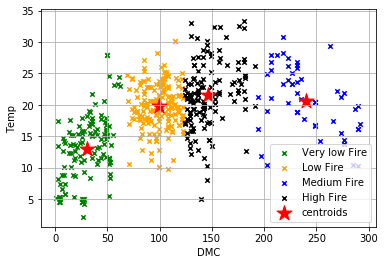

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=4,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=0,
       tol=0.0001, verbose=0)

In [14]:
unsupervised_model = unsupervised_method(X)
unsupervised_model